# Exploratory Analysis

In [1]:
#Import libraries

import pandas as pd
from constants import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
#Functions to read data

#Read values for each parameter
def read_values(index, list):
    list_values = []
    for l in list:
        list_values.append(df_main.iloc[index][l])
    return list_values

#Plot histogram for given list
def plot_histogram(list, bins, xlabel, ylabel, title):
    plt.hist(list, bins=bins, facecolor='green')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [3]:
#Read data
df_main = pd.read_csv('Data/cleaned.txt', sep=",")
print("Cleaned dataset size is",len(df_main))

Cleaned dataset size is 11087


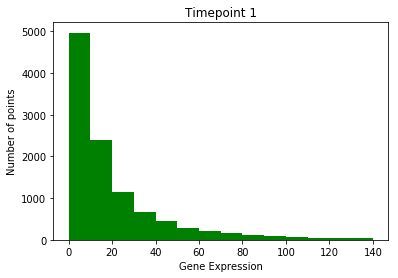

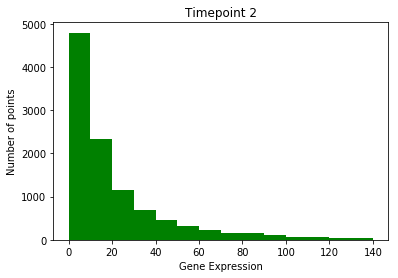

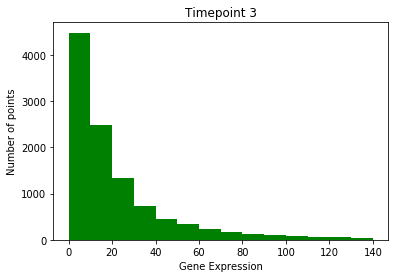

In [7]:
# the histogram of the data
bins = range(0,150,10)
xlabel = 'Gene Expression'
ylabel = 'Number of points'
title = 'Timepoint '
for i in TIMEPOINTS:
    plot_histogram(df_main['cdRPKM'+str(i)],bins,xlabel,ylabel,title+str(i+1))


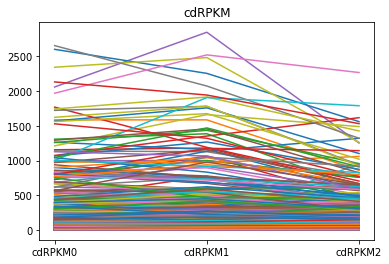

In [21]:
# Plot each parameter from graph
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): # Plot first 20 values
        expression_values = read_values(j, var_plot_list)
        fig.plot(var_plot_list, expression_values)
    plt.title(var_plot)
    plt.show()

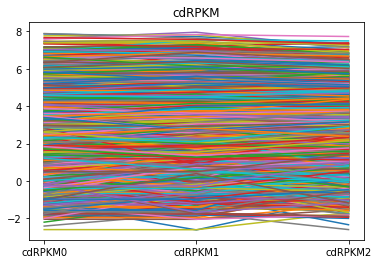

In [23]:
# Do log plot
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): # Plot first 20 values
        expression_values = read_values(j, var_plot_list)
        fig.plot(var_plot_list, np.log(expression_values))
    plt.title(var_plot)
    plt.show()